In [117]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<img src="https://randalolson.com/assets/2015/08/nyc-weather-july14-june15-annotated.png">

In [118]:
import getweather

***It seems you're requesting the weather data for the city of Charlotte for the years 1910 to 2018, specifically for the variables 'TMIN' (minimum temperature) and 'TMAX' (maximum temperature) using the getyear function from the getweather module.***

***This code snippet will create a NumPy array named allyears containing the stacked weather data retrieved from the getyear function for each year in the range 1910 to 2018.***

***Now, to access and analyze this data, you can perform various operations depending on your needs. For example, you can calculate statistics like mean, median, or plot the data to visualize trends over the years.***

In [19]:
allyears = np.vstack([getweather.getyear('CHARLOTTE', ['TMIN', 'TMAX'], year)
                     for year in range(1910, 2019)])

***This code will plot a heatmap of the minimum temperature data ('TMIN') for the years 1910 to 2018, with the x-axis representing the day of the year and the y-axis representing the year.***

***It wil also add a color bar to your plot, which helps to interpret the color scale used in the heatmap.***

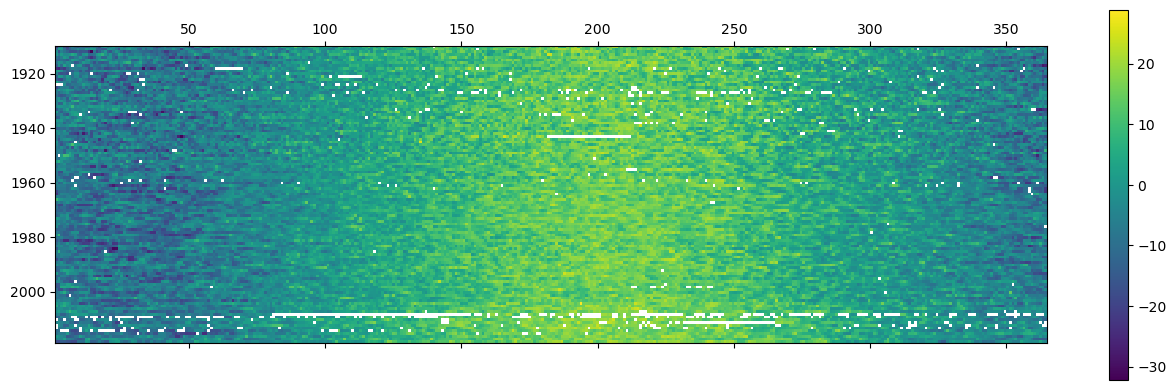

In [119]:
plt.matshow(allyears['TMIN'], extent=[1,365,2019,1910])
plt.colorbar()

***Calculate the minimum temperature records (tmin_record) and maximum temperature records (tmax_record) from the allyears array.***

***This will calculate the minimum temperature record for each day of the year across all years in your allyears data. Adjust the column names ('TMIN', 'TMAX') if they are different in your dataset.***

***allyears is a simple NumPy array, you can calculate the minimum temperature records directly from the array without using column names.***

In [21]:
tmin_record = np.nanmin(allyears['TMIN'], axis=0)
tmax_record = np.nanmin(allyears['TMAX'], axis=0)

***This code will plot the minimum and maximum temperature records over time. The x-axis represents the day of the year, and the y-axis represents the temperature.***

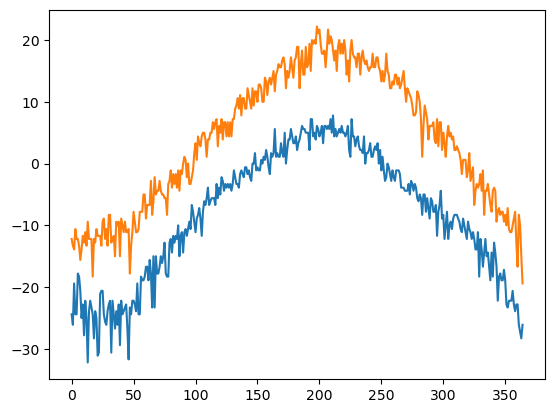

In [22]:
plt.plot(tmin_record)
plt.plot(tmax_record)

***Fetching weather data for the city of Pasadena for the years 1981 to 2010, specifically for the variables 'TMIN' (minimum temperature) and 'TMAX' (maximum temperature) using the getyear function from the getweather module.***

***This code will create a NumPy array named normal containing the stacked weather data for the specified years (1981 to 2010) and variables ('TMIN' and 'TMAX') for the city of Pasadena.***

In [32]:
normal = np.vstack([getweather.getyear('PASADENA', ['TMIN', 'TMAX'], year)
                   for year in range(1981, 2011)])

***It seems like you're trying to calculate the mean temperature values for the 'TMIN' (minimum temperature) and 'TMAX' (maximum temperature) variables from the normal array, which contains weather data for the city of Pasadena for the years 1981 to 2010.***

***This will calculate the mean temperature values for 'TMIN' and 'TMAX' variables over the years 1981 to 2010. Adjust the column names ('TMIN', 'TMAX') if they are different in your dataset.***

In [33]:
tmin_normal = np.mean(normal['TMIN'], axis=0)
tmax_normal = np.mean(normal['TMAX'], axis=0)

***plot the mean temperature values for the 'TMIN' (minimum temperature) and 'TMAX' (maximum temperature) variables over time. Assuming tmin_normal and tmax_normal contain the mean temperature values for each day of the year, you can use Matplotlib's plt.plot() function to create line plots for each variable.***

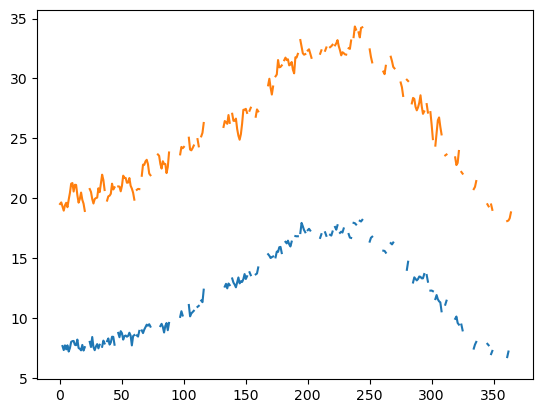

In [34]:
plt.plot(tmin_normal)
plt.plot(tmax_normal)

***Fetch weather data for the city of Pasadena for the year 2018, specifically for the variables 'TMIN' (minimum temperature) and 'TMAX' (maximum temperature) using the getyear function from the getweather module.***

***This code will fetch the weather data for the city of Pasadena for the year 2018 and store it in the thisyear variable.***

In [72]:
station, year = 'PASADENA', 2018

thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

***This code will fill the area between the 'TMIN' and 'TMAX' curves with a light blue color, visualizing the temperature range for each day of the year 2018 in Pasadena.***

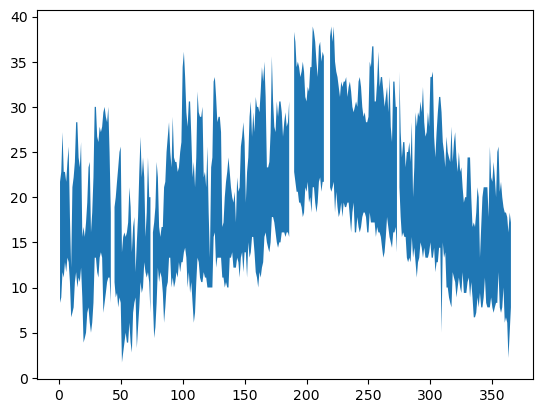

In [73]:
days = np.arange(1, 366)
plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'])

***Calculate the average temperature for the year 2018 in Pasadena by taking the mean of the minimum temperature ('TMIN') and maximum temperature ('TMAX') for that year.***

***This code will calculate the average temperature by taking the mean of the minimum and maximum temperatures for the year 2018 in Pasadena, considering any missing values (NaNs) in the data.***

In [74]:
avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))

***This will print a formatted string with the station name, year, and average temperature rounded to two decimal places.***

***To format the output string with the station name, year, and average temperature, you can use f-strings in Python.***

In [75]:
f'{station}, {year}: average temperature = {avg:.2f} C'

'PASADENA, 2018: average temperature = 19.46 C'

***Creating a complex plot to visualize temperature data.***

1. plt.figure(figsize=(15,4.5)): This line creates a new figure with a specified size (15 inches wide and 4.5 inches tall).

2. plt.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid'): This line fills the area between the minimum temperature record (tmin_record) and the maximum temperature record (tmax_record) with a light color (RGB: 0.92, 0.92, 0.89) using the fill_between function. The step='mid' argument indicates that the step type is 'mid' (i.e., the value is constant until the next x coordinate).

3. plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72)): This line fills the area between the normal minimum temperature (tmin_normal) and the normal maximum temperature (tmax_normal) with a different color (RGB: 0.78, 0.72, 0.72) using the fill_between function.

4. plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid'): This line fills the area between the minimum temperature (thisyear['TMIN']) and the maximum temperature (thisyear['TMAX']) for the specified year (2018) with a different color (RGB: 0.73, 0.21, 0.41) and transparency (alpha=0.6) using the fill_between function.

5. plt.axis(xmin=1, xmax=365, ymin=15, ymax=50): This line sets the limits for the x-axis (day of the year) from 1 to 365 and the y-axis (temperature) from 15 to 50 degrees Celsius using the axis function.

***This code generates a filled area plot with different colors representing different temperature ranges for the minimum and maximum temperatures of the records, normal temperatures, and temperatures for the specified year (2018).***

(1.0, 365.0, 15.0, 50.0)

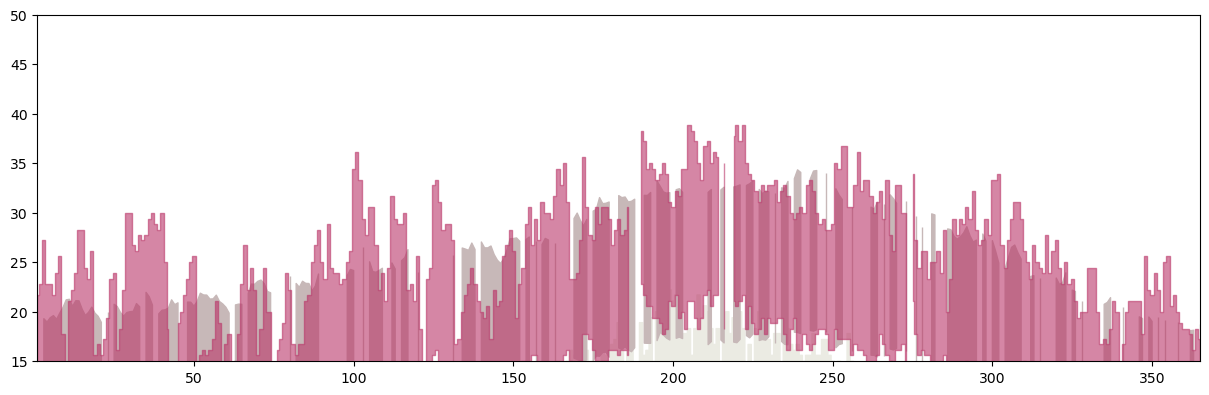

In [77]:
plt.figure(figsize=(15,4.5))

plt.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))

plt.fill_between(days, thisyear['TMIN'], thisyear['TMAX'],
                 color=(0.73,0.21,0.41), alpha=0.6, step='mid')

plt.axis(xmin=1, xmax=365, ymin=15, ymax=50)

***Create a plot showing temperature data for a specific weather station and year. It looks like the function fetches weather data for the specified station and year, calculates various temperature statistics, and then plots the data using Matplotlib.***

1. Fetches weather data for the specified station and year, covering the years 1910 to 2019.
2. Fetches normal weather data for the specified station, covering the years 1981 to 2010.
3. Calculates the minimum and maximum temperature records (tmin_record and tmax_record) across all years.
4. Calculates the mean normal temperatures (tmin_normal and tmax_normal) for the normal period (1981-2010).
5. Plots the temperature ranges for the records, normal temperatures, and temperatures for the specified year using fill_between.
6. Sets the axis limits for the plot.
7. Calculates the average temperature for the specified year.
8. Sets the plot title including the station name, year, and average temperature.

***The function nyplot seems to encapsulate all the necessary steps to create the desired plot. However, remember to add import matplotlib.pyplot as plt at the beginning of your script or function if it's not already imported.***

***This will create a plot showing temperature data for Pasadena in the year 2018.***

In [100]:
def nyplot(station, year):
    plt.figure(figsize=(15,4.5))

    allyears = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                         for year in range(1910, 2020)])

    normal = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                         for year in range(1981, 2011)])

    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)

    days = np.arange(1, 366)

    plt.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
    plt.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))

    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    plt.fill_between(days,thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid')

    plt.axis(xmin=1, xmax=365, ymin=15, ymax=50)

    avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    plt.title(f'{station}, {year}: average temperature = {avg:.2f} C')


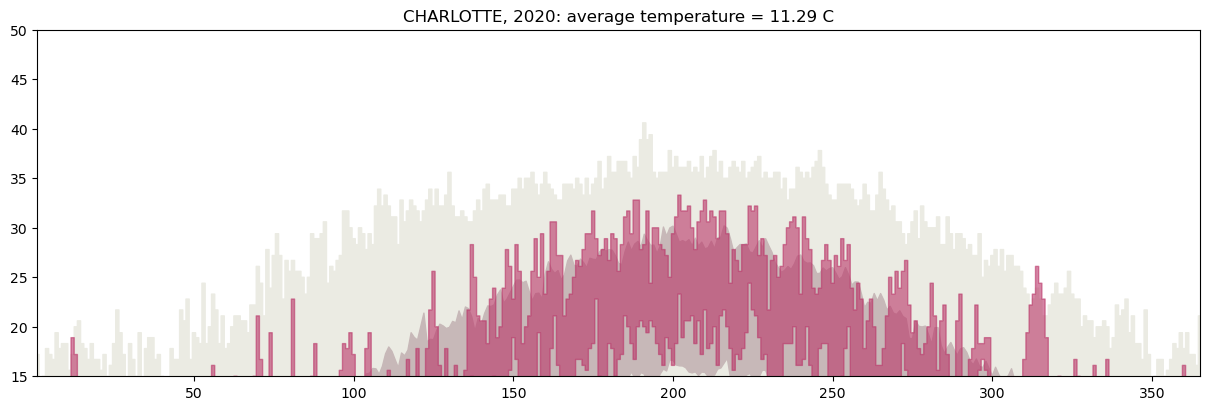

In [116]:
nyplot('CHARLOTTE', 2020)